# Exploratory data analysis

## First we need to import all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv("E:\Ekeeda assignments\penguin\penguins_size.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
#checking for null values.
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

## Here we can see the amount of Null values in each of the columns of our dataframe.

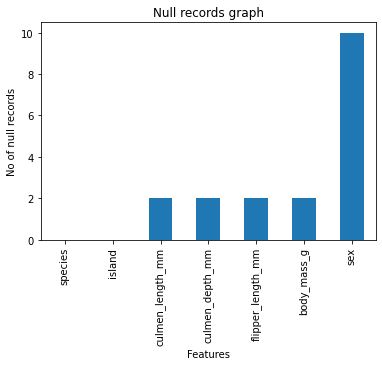

In [7]:
df.isna().sum().plot(kind = 'bar',xlabel = 'Features', ylabel = 'No of null records', title = 'Null records graph')
plt.show()

In [8]:
#Imputing numerical column null values with mean value.
df.fillna(df.mean(), inplace = True)

In [9]:
df.isna().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [10]:
# Dropping the null values rows from the column 'sex'.
df.dropna(inplace = True)

In [11]:
len(df)

334

## As we got rid of all the null values as of now.

In [12]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## We need to visualise the data using matplotlib and seaborn.

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

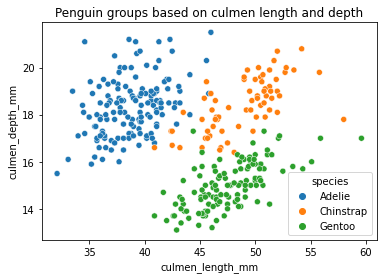

In [14]:
sns.scatterplot(x = 'culmen_length_mm', y = 'culmen_depth_mm', hue = 'species', data = df,)
plt.title("Penguin groups based on culmen length and depth")

plt.show()


In [15]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

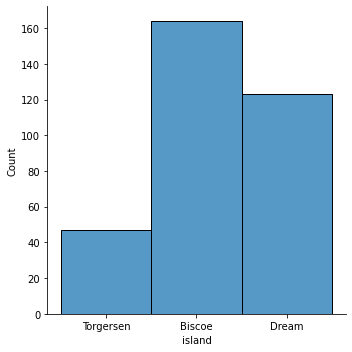

In [16]:
sns.displot(df['island'])
plt.show()

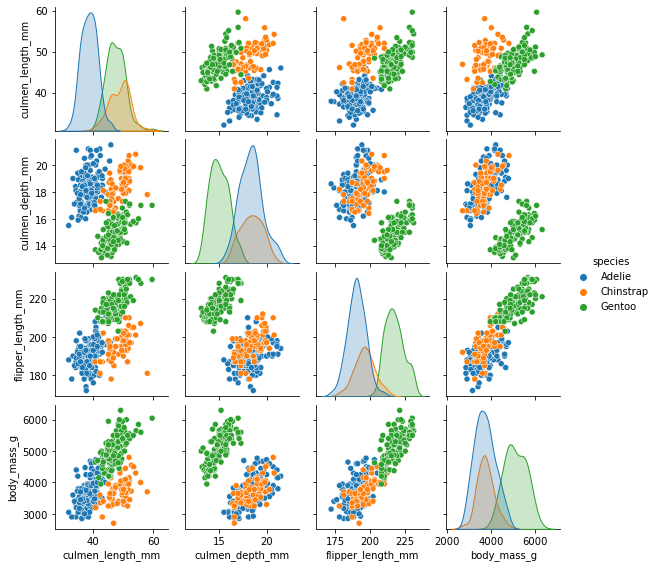

In [17]:
sns.pairplot(df,hue = 'species', height=2)
plt.show()

## With the below boxplots we can detect for outliers.

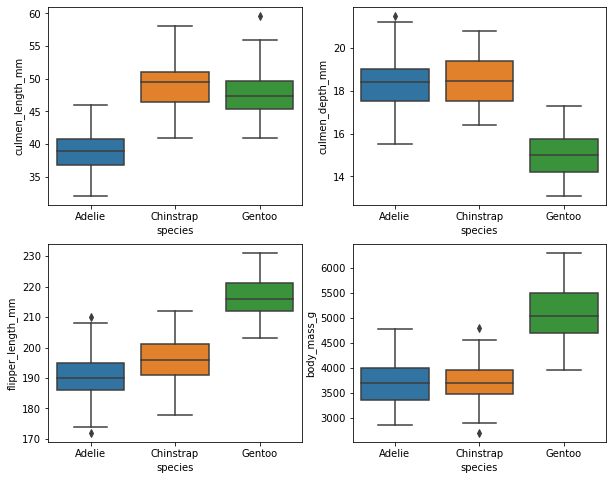

In [18]:
def graph(y):
    sns.boxplot(x='species',y=y, data = df)
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

plt.subplot(221)
graph('culmen_length_mm')

plt.subplot(222)
graph('culmen_depth_mm')

plt.subplot(223)
graph('flipper_length_mm')

plt.subplot(224)
graph('body_mass_g')



plt.show()

In [19]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers 

In [20]:
find_outliers_IQR(df['culmen_length_mm'])

Series([], Name: culmen_length_mm, dtype: float64)

In [21]:
find_outliers_IQR(df['culmen_depth_mm'])

Series([], Name: culmen_depth_mm, dtype: float64)

In [22]:
find_outliers_IQR(df['body_mass_g'])

Series([], Name: body_mass_g, dtype: float64)

In [23]:
find_outliers_IQR(df['flipper_length_mm'])

Series([], Name: flipper_length_mm, dtype: float64)

## As we can see that there are no outliers as of now in the Dataset.

In [24]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,334.000000,334.000000,334.000000,334.000000
mean,43.994311,17.160479,201.014970,4209.056886
std,5.460521,1.967909,14.022175,804.836129
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.575000,18.700000,213.000000,4793.750000
max,59.600000,21.500000,231.000000,6300.000000


## Now let's encode the categorical variables into numbers.

In [25]:
df=df[df['sex']!='.']

In [26]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [27]:
nominal_vars = df[['island','sex']]

In [28]:
df.shape

(333, 7)

In [29]:
encoded = pd.get_dummies(nominal_vars, drop_first= True)

In [30]:
df = pd.concat([df,encoded],axis=1)

In [31]:
df = df.drop(nominal_vars, axis = 1)

In [35]:
df.reset_index(inplace=True)

## Now let's make classes for various species of penguins.

In [36]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [37]:
dic = {'Adelie':0,'Gentoo':1,'Chinstrap':2}

In [38]:
df['species'] = df['species'].map(dic)

In [39]:
df

,index,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,0,0,39.1,18.7,181.0,3750.0,0,1,1
1,1,0,39.5,17.4,186.0,3800.0,0,1,0
2,2,0,40.3,18.0,195.0,3250.0,0,1,0
3,4,0,36.7,19.3,193.0,3450.0,0,1,0
4,5,0,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...,...,...
328,338,1,47.2,13.7,214.0,4925.0,0,0,0
329,340,1,46.8,14.3,215.0,4850.0,0,0,0
330,341,1,50.4,15.7,222.0,5750.0,0,0,1
331,342,1,45.2,14.8,212.0,5200.0,0,0,0


In [40]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [41]:
df.shape

(333, 9)

In [42]:
nums = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']]

In [43]:
minmax_nums = ms.fit_transform(nums)

In [44]:
minmax_nums = pd.DataFrame(minmax_nums, columns=['culmenlength_mm', 'culmendepth_mm', 'flipperlength_mm','bodymass_g'])

In [45]:
df = pd.concat([df,minmax_nums], axis = 1)

In [47]:
df = df.drop(nums,axis = 1)

In [48]:
df.dropna(inplace=True)

In [52]:
df

,index,species,island_Dream,island_Torgersen,sex_MALE,culmenlength_mm,culmendepth_mm,flipperlength_mm,bodymass_g
0,0,0,0,1,1,0.254545,0.666667,0.152542,0.291667
1,1,0,0,1,0,0.269091,0.511905,0.237288,0.305556
2,2,0,0,1,0,0.298182,0.583333,0.389831,0.152778
3,4,0,0,1,0,0.167273,0.738095,0.355932,0.208333
4,5,0,0,1,1,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...,...,...,...,...,...
328,338,1,0,0,0,0.549091,0.071429,0.711864,0.618056
329,340,1,0,0,0,0.534545,0.142857,0.728814,0.597222
330,341,1,0,0,1,0.665455,0.309524,0.847458,0.847222
331,342,1,0,0,0,0.476364,0.202381,0.677966,0.694444


## Exploratory data analysis has been completed and the Dataset is ready for further evaluation.